###  Multinomial Logistic Regression - Soft Max Regression
#### Using Gradient Descent
#### Notebook Author: Nirupam Purushothama

#### Referred Books & Links: 
Hands-on Machine Learning with Scikit-Learn & TensorFlow - Aurelien Geron

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
train_df = pd.read_csv("./training.csv")
x = np.array(train_df.iloc[:,1:28])
y = np.array(train_df.iloc[:,0])

# To adjust for the code below
y = y -1

# x.shape[1]

#### 1.1 Softmax scoring function

The function h_func_multilogit computes the estimated probability that x belongs to class k

In [3]:
# Logistic regression
def h_func_logit(logits):
    denom = 1 + np.exp(-logits)
    return 1/denom

# Multinomial logistic regression
def h_func_multilogit(logits):
    # Convert to a manageable range
    min_l = np.min(logits)
    max_l = np.max(logits)
    o_range = max_l - min_l
    n_range = 600
    
    logits = (logits - min_l) * n_range / o_range
    
    exps = np.exp(logits)
    #exps = np.abs(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [4]:
def to_one_hot(y):
    n_classes = y.max()+1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    
    return Y_one_hot

In [5]:
y_train_one_hot = to_one_hot(y)

#### 1.2. Accuracy Calculator

In [6]:
def check_accuracy(the):
    test_df = pd.read_csv("./testing.csv")
    x_t = np.array(test_df.iloc[:,1:28])
    y_t = np.array(test_df.iloc[:,0])

    # To adjust for the code below
    y_t = y_t -1

    x_t.shape[1]


    m =  x_t.shape[0] # number of data points

    # Add a bias to each of the rows (i.e. a constant)
    x_t_b = np.c_[np.ones((m,1)),x_t]


    logs = x_t_b.dot(the)
    Y_proba = h_func_multilogit(logs)
    y_predict = np.argmax(Y_proba, axis=1)

    accuracy_score = np.mean(y_predict == y_t)
    return accuracy_score

#### 2. Batch Gradient Descent

0.8153846153846154

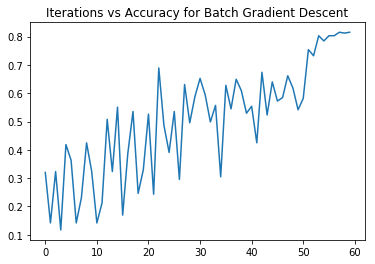

In [7]:
alpha = 0.5 # learning rate
n_iterations = 60
m =  x.shape[0] # number of data points
n = x.shape[1] # number of features
epsilon = 1e-7

# Add a bias to each of the rows (i.e. a constant)
x_b = np.c_[np.ones((m,1)),x]
np.random.seed(13)
theta = np.random.randn(n + 1,y.max()+1)
accu = []
for i in range(n_iterations):
    logits = np.matmul(x_b,theta)
    h_of_xtheta = h_func_multilogit(logits)
    #print(h_of_xtheta)
#     loss = -np.mean(np.sum(y_train_one_hot * np.log(h_of_xtheta + epsilon), axis=1))
    error = y_train_one_hot - h_of_xtheta
    
    gradients = x_b.T.dot(error)
    theta = theta + alpha * gradients
    
    if i % 1 == 0:
        accu.append(check_accuracy(theta))
#         print(i, check_accuracy(theta))
plt.plot(range(n_iterations),accu)
plt.title('Iterations vs Accuracy for Batch Gradient Descent')
check_accuracy(theta)

#### 3. Stochastic Gradient Descent
Operates on one line item at a time

0.8092307692307692

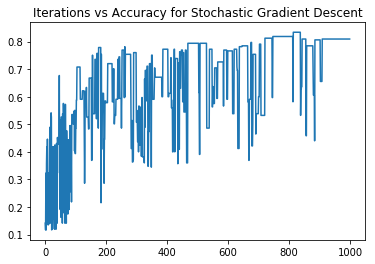

In [8]:
alpha = 0.01 # learning rate
n_iterations = 1000
m =  x.shape[0] # number of data points
n = x.shape[1] # number of features
epsilon = 0

# Add a bias to each of the rows (i.e. a constant)
x_b = np.c_[np.ones((m,1)),x]
np.random.seed(13)
theta = np.random.randn(n + 1,y.max()+1)
accu =[]
for i in range(n_iterations):
    number = np.random.randint(0,high=m-1)
    
    logits = np.matmul(x_b[number:number+1],theta)
    h_of_xtheta = h_func_multilogit(logits)

    loss = -np.mean(np.sum(y_train_one_hot * np.log(h_of_xtheta + epsilon), axis=1))
    error = y_train_one_hot[number:number+1] - h_of_xtheta
    
    gradients = x_b[number:number+1].T.dot(error)
    theta = theta + alpha * gradients
    
    if i % 1 == 0:
        accu.append(check_accuracy(theta))

plt.plot(range(n_iterations),accu)
plt.title('Iterations vs Accuracy for Stochastic Gradient Descent')
check_accuracy(theta)

#### 4. Mini-Batch Gradient Descent
Operates by taking in small batches (defined by the mini_batch_size) variable

0.7815384615384615

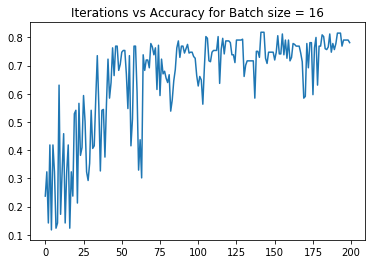

In [9]:
alpha = 0.6 # learning rate
n_iterations = 200
m =  x.shape[0] # number of data points
n = x.shape[1] # number of features
epsilon = 1e-7

# Add a bias to each of the rows (i.e. a constant)
x_b = np.c_[np.ones((m,1)),x]

np.random.seed(13)
theta = np.random.randn(n + 1,y.max()+1)

mini_batch_size = 15
accu = []
for i in range(n_iterations):
    number = np.random.randint(mini_batch_size+1,high=m-1)
    
    logits = np.matmul(x_b[number-mini_batch_size-1:number],theta)
    h_of_xtheta = h_func_multilogit(logits)

#     loss = -np.mean(np.sum(y_train_one_hot[number-mini_batch_size-1:number]  * np.log(h_of_xtheta + epsilon), axis=1))
#     loss = -np.mean(np.sum(y_train_one_hot*np.log(h_of_xtheta + epsilon), axis=1))
    error = y_train_one_hot[number-mini_batch_size-1:number] - h_of_xtheta
#     if i % 500 == 0:
#         print(i, loss)
    gradients = x_b[number-mini_batch_size-1:number].T.dot(error)
    theta = theta + alpha * gradients
    if i % 1 == 0:
        accu.append(check_accuracy(theta))

plt.plot(range(n_iterations),accu)
plt.title('Iterations vs Accuracy for Batch size = 16')
check_accuracy(theta)